In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite_utils import Database

sns.set(color_codes=True)

In [2]:
db = Database("mybinder_archive.db")

In [3]:
# get table names
db.table_names()

['mybinderlaunch', 'repo', 'notebook']

In [4]:
repo_table = 'repo'
notebook_table = 'notebook'

In [5]:
# db[repo_table].columns
db[repo_table].columns_dict

{'id': int,
 'remote_id': str,
 'provider': str,
 'repo_url': str,
 'first_launch_ts': str,
 'last_launch_ts': str,
 'last_spec': str,
 'ref': str,
 'resolved_ref': str,
 'resolved_date': str,
 'resolved_ref_date': str,
 'fork': int,
 'renamed': int,
 'launch_count': int,
 'binder_dir': str,
 'buildpack': str,
 'nbs_count': int}

In [6]:
db[notebook_table].columns_dict

{'repo_id': int, 'nb_rel_path': str}

In [7]:
query = f'SELECT * FROM {repo_table} ORDER BY first_launch_ts;'
repos = pd.read_sql_query(query, db.conn)
# repos = repos[
#     ["id", "remote_id", "provider", "repo_url", 
#      "last_spec", "resolved_ref", "launch_count", 
#      "fork","renamed", "launch_count", 
#      "binder_dir", "buildpack", "nbs_count"]]

In [8]:
# def make_clickable(val):
#     return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [9]:
# repos.style.format({'repo_url': make_clickable})

In [10]:
len(repos)

50265

In [11]:
repos.head()

,id,remote_id,provider,repo_url,first_launch_ts,last_launch_ts,last_spec,ref,resolved_ref,resolved_date,resolved_ref_date,fork,renamed,launch_count,binder_dir,buildpack,nbs_count
0,1,3641953,GitHub,https://github.com/ipython/ipython-in-depth,2018-11-03T00:00:00,2020-06-30T23:59:00,ipython/ipython-in-depth/master,None,7e5ce96cc9251083979efdfc393425f1229a4a68,2020-07-25T18:42:00,2019-04-22T15:12:08,0,0.0,3581285,binder,CondaBuildPack,94.0
1,2,99244384,GitHub,https://github.com/qiskit/qiskit-tutorial,2018-11-03T00:00:00,2020-06-19T09:42:00,QISKit/qiskit-tutorial/master,None,15f92d45dc0df6c1201dcacd3d3d9c46e32da9c9,2020-07-25T18:42:00,2020-07-23T11:02:09,0,2.0,22333,,CondaBuildPack,63.0
2,3,None,GitHub,https://github.com/eniocsj/dados,2018-11-03T00:01:00,2018-11-14T12:15:00,eniocsj/dados/master,None,None,None,None,404,NaN,42,None,None,NaN
3,4,69698350,GitHub,https://github.com/jupyterlab/jupyterlab-demo,2018-11-03T00:01:00,2020-06-30T23:59:00,jupyterlab/jupyterlab-demo/try.jupyter.org,None,71b616307dcb9cba18262d8e5fa46ad828ca51e4,2020-07-25T18:42:00,2019-07-10T17:08:41,0,0.0,1680558,binder,CondaBuildPack,6.0
4,5,21578345,GitHub,https://github.com/bokeh/bokeh-notebooks,2018-11-03T00:02:00,2020-06-30T23:38:00,bokeh/bokeh-notebooks/master,None,7b6da26945e284b19df07daecc6beabdb7adbe81,2020-07-25T18:42:00,2020-07-20T22:34:18,0,0.0,146801,,CondaBuildPack,18.0


### Understanding repos table

#### Forks

In [12]:
repos.fillna(-1).groupby("fork").size()
# query = f'select fork, count(*) from {repo_table} group by "fork";'
# forks = pd.read_sql_query(query, db.conn)

fork
0      39754
1       4655
404     5854
451        2
dtype: int64

fork=404 means that repo doesnt exist anymore.

now check those 2 repos which have fork as 451

In [13]:
repos[repos["fork"] == 451][["resolved_ref", "repo_url"]]

,resolved_ref,repo_url
16581,None,https://github.com/doublelabyrinth/mobaxterm-k...
25415,None,https://github.com/abhat222/data-science--chea...


These 2 repos returns "Repository access blocked" ("HTTP 451: Unavailable for Legal Reasons")
- https://github.com/doublelabyrinth/mobaxterm-keygen
- https://github.com/abhat222/data-science--cheat-sheet

In [14]:
len(repos[repos["fork"].isin([404, 451])])

5856

In [15]:
# if fork is 404, remote_id should be null (not available)
repos[repos["remote_id"].isnull()].fillna(-1).groupby("fork", as_index = False).size()

fork
404    5854
451       2
dtype: int64

In [16]:
repos[repos["fork"].isin([404, 451])][["repo_url", "remote_id", "last_spec", "resolved_ref",
                                   "resolved_date", "resolved_ref_date", "binder_dir", 
                                    "buildpack", "nbs_count"]]

,repo_url,remote_id,last_spec,resolved_ref,resolved_date,resolved_ref_date,binder_dir,buildpack,nbs_count
2,https://github.com/eniocsj/dados,None,eniocsj/dados/master,None,None,None,None,None,NaN
15,https://github.com/udm88/home_work_2,None,udm88/home_work_2/master,None,None,None,None,None,NaN
17,https://github.com/liviu-anita/calcul-numeric,None,liviu-anita/Calcul-Numeric/master,None,None,None,None,None,NaN
38,https://github.com/bengal-tiger/youcandothermo...,None,BENGAL-TIGER/YOUcanDoThermodynamics/master,None,None,None,None,None,NaN
39,https://github.com/marlohaering/se1-notebook,None,marlohaering/SE1-Notebook/master,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...
50230,https://github.com/winafiu/voila_bear,None,winafiu/voila_bear/master,None,None,None,None,None,NaN
50243,https://github.com/hwhk/test,None,hwhk/test/master,None,None,None,None,None,NaN
50249,https://github.com/hwhk/temtations,None,hwhk/Temtations/master,None,None,None,None,None,NaN
50262,https://github.com/secregister01/datasciencemi...,None,secregister01/DataScienceMiniProject.github.io...,None,None,None,None,None,NaN


#### Resolved refs

`create_repo_table.py` fetches resolved ref of the last spec at the time that the script is running (resolved_date).
`resolved_ref="404"` means that the specs is not valid anymore.

In [17]:
repos[["repo_url", "last_spec", "resolved_ref", "fork"]]

,repo_url,last_spec,resolved_ref,fork
0,https://github.com/ipython/ipython-in-depth,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,0
1,https://github.com/qiskit/qiskit-tutorial,QISKit/qiskit-tutorial/master,15f92d45dc0df6c1201dcacd3d3d9c46e32da9c9,0
2,https://github.com/eniocsj/dados,eniocsj/dados/master,None,404
3,https://github.com/jupyterlab/jupyterlab-demo,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,0
4,https://github.com/bokeh/bokeh-notebooks,bokeh/bokeh-notebooks/master,7b6da26945e284b19df07daecc6beabdb7adbe81,0
...,...,...,...,...
50260,https://github.com/zap1295/my-first-binder,zap1295/my-first-binder/master,fb8d541160424ba26e1bd1180dd9dbbde39a850c,0
50261,https://github.com/mgill25/jupyter-playground,mgill25/jupyter-playground/master,dabd67884a845e202b689ca695597a156b996833,0
50262,https://github.com/secregister01/datasciencemi...,secregister01/DataScienceMiniProject.github.io...,None,404
50263,https://github.com/elewah/2d-3d-radviz-lib,elewah/2D-3D-RadViz-lib/master,None,404


In [18]:
len(repos[repos["resolved_ref"].isnull() |  (repos["resolved_ref"] == "404")])

6185

resolved ref is null, if fork is 404 or 451

In [19]:
print(len(repos[repos["resolved_ref"].isnull()]))
print(len(repos[repos["resolved_ref"].isnull() & repos["fork"].isin([404, 451])]))

5861
5856


These 5 repos exist but had error while getting the resolved ref info:

- https://github.com/twbs/bootstrap : 
```
Exception: ['git', 'checkout', 'gh-pages']: error: Your local changes to the following files would be overwritten by checkout:
...
Please, commit your changes or stash them before you can switch branches.
```
- https://github.com/lakarstens/controllingcontaminants16s:
```
Exception: ['git', 'clone', 'https://github.com/lakarstens/controllingcontaminants16s', '/tmp/tmplvvc0_ux']: Cloning into '/tmp/tmplvvc0_ux'...
error: Invalid path '.git:info:exclude'
fatal: unable to checkout working tree
warning: Clone succeeded, but checkout failed.
You can inspect what was checked out with 'git status'
and retry the checkout with 'git checkout -f HEAD'
```
- https://github.com/noahgriff99/320-final-project: 
```
Exception: ['git', 'checkout', '925075b4aec9bf4f2329bd60e6d5fd5fbc8c2bd3']: error: Your local changes to the following files would be overwritten by checkout:
	BillboardNSpotify.html
	index.html
	index.html.html
Please, commit your changes or stash them before you can switch branches.
```
- https://gist.github.com/vb16/0827905b1e8f4a0a76ff: 
```
Exception: ['git', 'clone', 'https://gist.github.com/vb16/0827905b1e8f4a0a76ff', '/tmp/tmp2amqsj1u']: Cloning into '/tmp/tmp2amqsj1u'...
fatal: could not read Username for 'https://gist.github.com': terminal prompts disabled
```
- https://github.com/koldanya/water:
```
Exception: ['git', 'checkout', '96b97b2ec30213b29ee602c76f14ea515fbd97a4']: error: Your local changes to the following files would be overwritten by checkout:
	README.md
Please, commit your changes or stash them before you can switch branches.
```

Some repos exists but resolved_ref_now of their spec doesn't

TODO what are reasons for this?
1. spec is not valid anymore, e.g. branch is deleted

In [20]:
len(repos[repos["resolved_ref"] == "404"])

324

In [21]:
# select fork, remote_id, last_spec, resolved_ref_now,refs,repo_url from repo where resolved_ref_now=404 and fork!=404;
repos[(repos["resolved_ref"] == "404") & 
      (repos["fork"].isin([0,1]))][["repo_url", "last_spec", "resolved_ref",
                                   "resolved_date", "resolved_ref_date", "binder_dir", 
                                    "buildpack", "nbs_count"]]

,repo_url,last_spec,resolved_ref,resolved_date,resolved_ref_date,binder_dir,buildpack,nbs_count
70,https://github.com/delsim/jupyter-plotly-dash,delsim/jupyter-plotly-dash/messaging,404,2020-07-25T18:42:00,None,None,None,NaN
87,https://github.com/jiaweizhuang/geoschem-pytho...,JiaweiZhuang/GEOSChem-python-tutorial/master,404,2020-07-25T18:42:00,None,None,None,NaN
270,https://github.com/jhamman/dask-examples,jhamman/dask-examples/xarray,404,2020-07-25T18:44:00,None,None,None,NaN
455,https://github.com/pymlvizard/mlpyviz,PyMLVizard/MLPyViz/develop_GD,404,2020-07-25T18:47:00,None,None,None,NaN
785,https://github.com/binderhub-ci-repos/requirem...,binderhub-ci-repos/requirements/1593550219.663...,404,2020-07-25T18:51:00,None,None,None,NaN
...,...,...,...,...,...,...,...,...
49730,https://github.com/murraylab/psychrnn,murraylab/PsychRNN/read_docs,404,2020-07-26T10:06:00,None,None,None,NaN
49850,https://github.com/betatim/mcl-dsci-011-progra...,betatim/MCL-DSCI-011-programming-in-python/pat...,404,2020-07-26T10:06:00,None,None,None,NaN
49890,https://github.com/spinicist/quit,spinicist/QUIT/mybinder,404,2020-07-26T10:06:00,None,None,None,NaN
50105,https://github.com/pykeen/pykeen,pykeen/pykeen/update-docs,404,2020-07-26T10:13:00,None,None,None,NaN


There are repos that have same resolved ref but have different remote ids.

One reason could be that a user creates a new repo with history of another repo (without using github forking)

In [22]:
query = f'select fork, renamed, count(resolved_ref) as rr_count, resolved_ref, '\
                 f'GROUP_CONCAT(DISTINCT repo_url) AS repo_urls '\
        f'from {repo_table} '\
        f'where fork=0 AND renamed=0 '\
        f'group by "resolved_ref" '\
        f'having rr_count>1;'
pd.read_sql_query(query, db.conn)
# query = 'select fork, renamed, count(resolved_ref_now) as rrn_count, resolved_ref_now, GROUP_CONCAT(DISTINCT repo_url) AS repo_urls from repo where fork!=1 AND renamed!=1 group by "resolved_ref_now" having rrn_count>1;'
# pd.read_sql_query(query, db.conn)

,fork,renamed,rr_count,resolved_ref,repo_urls
0,0,0,2,051d6dc57f10b605485bea0c3565130eaf064ec8,"https://github.com/data-8/materials-su18,https..."
1,0,0,6,20095e168f0d76da5787f914684cc3b6a58ce660,https://github.com/wshuyi/demo-spacy-text-proc...
2,0,0,2,218183a0845ec89cd4d27e8f350ccdc595855d87,"https://github.com/ines/course-starter-python,..."
3,0,0,2,2d2668d3b9a54546c681bc27efbbc9b326af1ab1,https://github.com/deep-diver/smartwork-with-p...
4,0,0,2,34f27959e509527945e3f2dfa6996f5f43b93750,"https://github.com/ines/course-starter-r,https..."
5,0,0,4,36bc4827ea1b53afd099e79a91d73614a6116bfe,"https://github.com/eminentspade/codingai-pub,h..."
6,0,0,2,3a95d118f9df5a86826e1791c5c100817f0fd924,https://github.com/udacity/deep-learning-v2-py...
7,0,0,2,3d0c70ddaa5c63606a043aaca35b64f4272651e0,"https://github.com/jason2249/section-8-a,https..."
8,0,0,144,404,https://github.com/jiaweizhuang/geoschem-pytho...
9,0,0,2,407bbe93bbfd2d0a1e3bcd10e2571a61a55661aa,"https://github.com/binder-examples/bokeh,https..."


#### Renamed repos
If repo x is renamed to y, then both rows have same "remote_id" and have "renamed" as "number of times that repo is renamed"

In [23]:
repos.fillna(-1).groupby("renamed").size()

renamed
-1.0     5856
 0.0    42469
 1.0     1772
 2.0      156
 3.0       12
dtype: int64

In [24]:
# if renamed info is not available, this means repo doesnt exists
repos[repos["renamed"].isnull()].groupby("fork", as_index = False).size()

fork
404    5854
451       2
dtype: int64

In [25]:
# list renamed repos
query = 'select fork, renamed, remote_id, GROUP_CONCAT(DISTINCT repo_url) AS repo_urls from repo where renamed=1 group by "remote_id";'
pd.read_sql_query(query, db.conn)

,fork,renamed,remote_id,repo_urls
0,0,1,102113664,"https://github.com/eamonnmag/cern-csc-2018,htt..."
1,0,1,102488943,https://github.com/belfasttechtraining/python-...
2,0,1,103228562,https://github.com/rambasnet/thinkpythonnotebo...
3,0,1,103370184,"https://github.com/stklik/crest,https://github..."
4,0,1,103943609,"https://github.com/jordan-melendez/gsum,https:..."
...,...,...,...,...
881,0,1,98230774,https://github.com/binder-examples/conda_envir...
882,0,1,98531561,"https://github.com/quantstack/xwidgets,https:/..."
883,0,1,99154413,"https://github.com/swyddfa/stylo,https://githu..."
884,0,1,d47484ac43a964fcea6547f36a5fdaa0,https://gist.github.com/akuzmanoski/d47484ac43...


In [26]:
# list renamed repos (in pandas)
repos[repos["renamed"] == 1].\
    groupby(["fork", "renamed", "remote_id"])["repo_url"].\
    apply(",".join).reset_index()

,fork,renamed,remote_id,repo_url
0,0,1.0,102113664,"https://github.com/eamonnmag/cern-csc-2018,htt..."
1,0,1.0,102488943,https://github.com/belfasttechtraining/python-...
2,0,1.0,103228562,https://github.com/rambasnet/thinkpythonnotebo...
3,0,1.0,103370184,"https://github.com/stklik/crest,https://github..."
4,0,1.0,103943609,"https://github.com/jordan-melendez/gsum,https:..."
...,...,...,...,...
881,1,1.0,267892677,https://github.com/aewhite100/semester-biology...
882,1,1.0,273921616,https://github.com/jan-janssen/lammps-tutorial...
883,1,1.0,52304286,"https://github.com/hainm/nglview-notebooks,htt..."
884,1,1.0,90872423,https://github.com/islast/brainnetworksinpytho...


### Number of repos

In [27]:
# db[repo_table].count
len(repos)

50265

### Number of unique repos

In [28]:
# renamed repos have the same remote_id
len(repos.groupby("remote_id"))

43410

In [29]:
query = f"select count(*) from (select * from {repo_table} where remote_id is not null group by remote_id);"
db.conn.execute(query).fetchone()

(43410,)

In [30]:
# unique repos which are not fork
query = f"select count(*) from (select * from {repo_table} where remote_id is not null group by remote_id) where fork=0;"
db.conn.execute(query).fetchone()

(38813,)

### Number of notebooks

In [31]:
query = f'SELECT * FROM {notebook_table} ORDER BY repo_id;'
notebooks = pd.read_sql_query(query, db.conn)

In [32]:
len(notebooks)

411268

In [33]:
notebooks.head()

,repo_id,nb_rel_path
0,1,Index.ipynb
1,1,examples/Index.ipynb
2,1,examples/Parallel Computing/Index.ipynb
3,1,examples/Parallel Computing/Monitoring an MPI ...
4,1,examples/Parallel Computing/Monte Carlo Option...


In [34]:
repo_nbs = notebooks.groupby("repo_id").size().to_frame(name="nbs")
repo_nbs.head()

,nbs
repo_id,
1,94
2,63
4,6
5,18
6,2


In [35]:
len(repo_nbs[repo_nbs["nbs"] > 200])

158

In [36]:
len(repo_nbs[repo_nbs["nbs"] == 0])

0

array([[<AxesSubplot:title={'center':'nbs'}>]], dtype=object)

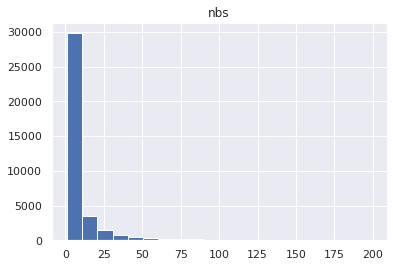

In [37]:
repo_nbs[(repo_nbs["nbs"]>0) & (repo_nbs["nbs"]<200)].hist(column="nbs", bins=20)

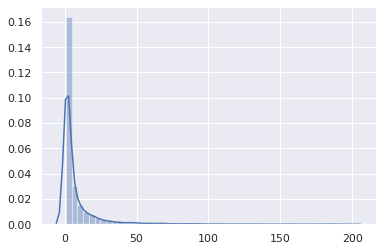

In [38]:
sns.distplot(repo_nbs[(repo_nbs["nbs"]>0) & (repo_nbs["nbs"]<200)]);

In [39]:
# fork and resolved_ref not available
len(repos[repos["nbs_count"].isnull()])

6185

In [40]:
# repo contains 0 notebook
len(repos[repos["nbs_count"] == 0])
# len(repos[(repos["nbs_count"] == 0) & (repos["launch_count"] >= 10)])

6749

In [41]:
# len(repos[~repos["nbs_count"].isnull() & (repos["nbs_count"] != 0)])
len(repos[repos["nbs_count"]>0])

37331

### Number of launches

In [42]:
len(repos[repos["launch_count"] < 10])

34995

In [43]:
len(repos[repos["launch_count"] > 1000])

369

In [44]:
len(repos[(repos["nbs_count"] > 0) & (repos["launch_count"] >= 10)])

12920

array([[<AxesSubplot:title={'center':'launch_count'}>]], dtype=object)

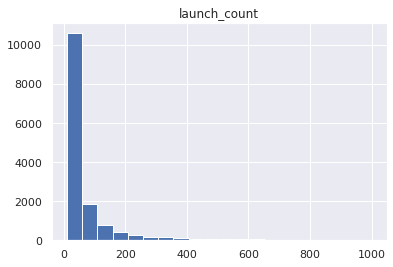

In [45]:
x = repos[(repos["launch_count"] >= 10) & (repos["launch_count"] < 1000)]
x.hist(column="launch_count", bins=20)

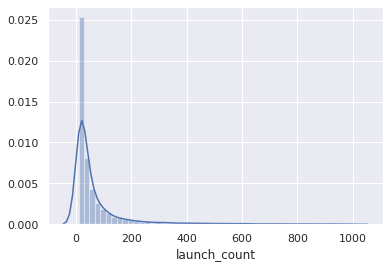

In [46]:
sns.distplot(x["launch_count"]);

### Buildpacks

In [47]:
repos.fillna(-1).groupby("buildpack").size()

buildpack
-1                              6185
CondaBuildPack                  7535
DockerBuildPack                 2154
JuliaProjectTomlBuildPack        420
JuliaRequireBuildPack             88
LegacyBinderDockerBuildPack      106
NixBuildPack                      15
PipfileBuildPack                 278
PythonBuildPack                32156
RBuildPack                      1328
dtype: int64

### Binder dirs

In [48]:
repos.fillna(-1).groupby("binder_dir").size()

binder_dir
-1          6185
           40695
.binder      429
binder      2956
dtype: int64